# Calculate average and upper Q of 2020 and 2021 (predict) players stats

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from typing import Dict, List, Tuple, Text

### Load 2020 player data

In [2]:
def postition_grouping(value) -> Text:
    forward = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw']
    mid = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
    back = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
    keeper = ['gk']
    
    position_dict = {}
    position_dict['forward'] = forward
    position_dict['mid'] = mid
    position_dict['back'] = back
    position_dict['keeper'] = keeper
    
    value_list = value.replace(' ','').split(',')
    
    for v in value_list:
        for position, items in position_dict.items():
            if v.lower() in items:
                return (position)
    print('Error')

In [3]:
csv_file='./data/players_20.csv'

fifa_data_20 = pd.read_csv(csv_file)
# Position
fifa_data_20['position'] = fifa_data_20['player_positions'].apply(lambda x: postition_grouping(x))
fifa_data_20['sofifa_id'] = fifa_data_20['sofifa_id'].apply(lambda x: int(x))
fifa_data_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,forward
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,forward
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,forward
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keeper
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,forward


### 2020 players stats

#### Overall

In [4]:
fifa_data_20['overall'].describe()

count    18278.000000
mean        66.244994
std          6.949953
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

In [5]:
fifa_20_overall_stats = fifa_data_20.groupby('position')['overall'].describe()
fifa_20_overall_stats.head()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
back,5938.0,66.282587,6.548813,48.0,62.0,66.0,70.0,90.0
forward,3442.0,66.650784,7.109887,48.0,62.0,66.0,71.0,94.0
keeper,2036.0,64.796660,7.603627,48.0,60.0,65.0,70.0,91.0
mid,6862.0,66.438648,6.950925,48.0,62.0,66.0,71.0,91.0


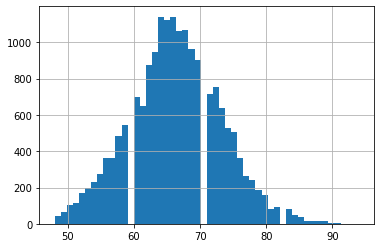

In [6]:
fifa_data_20['overall'].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A8868B320>,
      dtype=object)

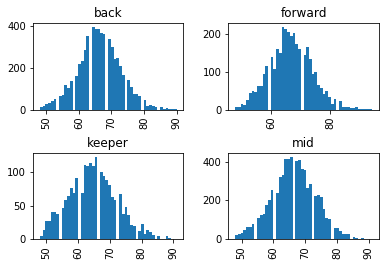

In [7]:
fifa_data_20['overall'].hist(bins=50, by=fifa_data_20['position'])

#### Player's Value (Eur)

In [8]:
mean_wage = np.mean(fifa_data_20['value_eur'])
sd_wage = np.std(fifa_data_20['value_eur'])
fifa_data_20_f = fifa_data_20[(fifa_data_20['value_eur'] >0) & (fifa_data_20['value_eur'] <= mean_wage + 2 * sd_wage)]
fifa_data_20_f['value_eur'].describe()

count    1.745800e+04
mean     1.736324e+06
std      2.529636e+06
min      1.000000e+04
25%      3.250000e+05
50%      7.000000e+05
75%      1.800000e+06
max      1.350000e+07
Name: value_eur, dtype: float64

In [9]:
fifa_data_20.groupby('position')['value_eur'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
back,5938.0,2.094454e+06,4.475174e+06,0.0,325000.0,675000.0,1800000.0,78000000.0
forward,3442.0,3.164576e+06,7.346654e+06,0.0,400000.0,875000.0,2800000.0,105500000.0
keeper,2036.0,1.728016e+06,4.973524e+06,0.0,140000.0,400000.0,975000.0,77500000.0
mid,6862.0,2.704119e+06,5.548817e+06,0.0,375000.0,800000.0,2400000.0,90000000.0


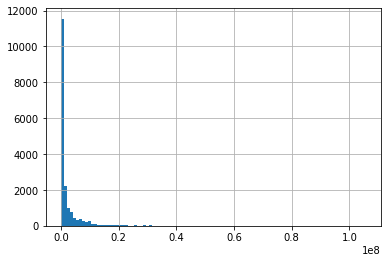

In [10]:
fifa_data_20['value_eur'].hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A8A4B5DA0>,
      dtype=object)

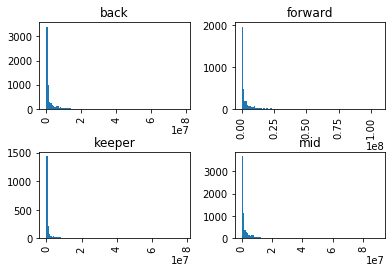

In [11]:
fifa_data_20['value_eur'].hist(bins=100, by=fifa_data_20['position'])

### Load 2021 player data

In [12]:
csv_file='2021_value_overall.csv'

fifa_data_21 = pd.read_csv(csv_file)
fifa_data_21['sofifa_id'] = fifa_data_21['sofifa_id'].apply(lambda x: int(x))
fifa_data_21.head()

,sofifa_id,overall_2021,position,value_eur_2021
0,158023,92.0,forward,13513486.0
1,20801,92.0,forward,11513372.0
2,190871,90.0,forward,17361418.0
3,200389,89.0,keeper,5759472.0
4,183277,89.0,forward,16287628.0


### 2021 (predict) players stats

#### Overall

In [13]:
fifa_data_21['overall_2021'].describe()

count    18278.000000
mean        67.303425
std          5.880674
min         52.000000
25%         64.000000
50%         67.000000
75%         71.000000
max         92.000000
Name: overall_2021, dtype: float64

In [14]:
fifa_data_21.groupby('position')['overall_2021'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
back,5938.0,67.255978,5.502766,52.0,64.0,67.0,71.0,89.0
forward,3442.0,67.726031,6.027368,52.0,64.0,67.0,71.0,92.0
keeper,2036.0,65.861984,6.514932,52.0,61.0,65.0,70.0,90.0
mid,6862.0,67.560187,5.859859,52.0,64.0,67.0,71.0,89.0


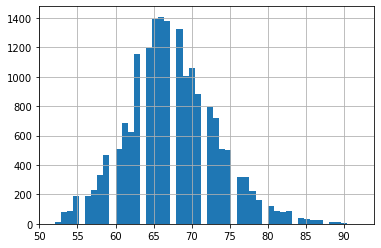

In [15]:
fifa_data_21['overall_2021'].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A8C178278>,
      dtype=object)

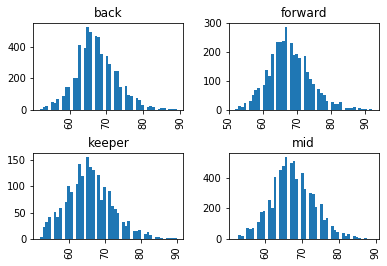

In [16]:
fifa_data_21['overall_2021'].hist(bins=50, by=fifa_data_21['position'])

#### Player's Valeu (Eur)

In [17]:
fifa_data_21['value_eur_2021'].describe()

count    1.827800e+04
mean     1.206927e+06
std      1.522208e+06
min     -1.365360e+05
25%      3.616600e+05
50%      6.153310e+05
75%      1.364401e+06
max      1.747380e+07
Name: value_eur_2021, dtype: float64

In [18]:
fifa_data_21.groupby('position')['value_eur_2021'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
back,5938.0,1.049056e+06,1.237247e+06,-123079.0,345113.50,547554.0,1169489.00,11521064.0
forward,3442.0,1.476386e+06,1.879016e+06,-35964.0,420664.25,760403.5,1753415.25,17473804.0
keeper,2036.0,6.552218e+05,7.129448e+05,-136536.0,264432.75,405468.5,697709.00,5944596.0
mid,6862.0,1.372072e+06,1.658561e+06,-58946.0,404113.00,735447.0,1599966.25,17092700.0


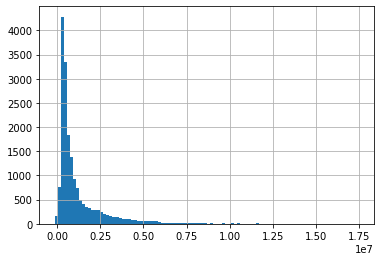

In [19]:
fifa_data_21['value_eur_2021'].hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A8C496358>,
      dtype=object)

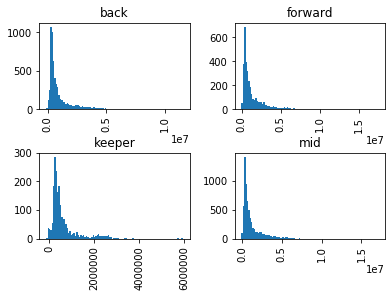

In [20]:
fifa_data_21['value_eur_2021'].hist(bins=100, by=fifa_data_20['position'])

In [21]:
fifa_20_overall_stats

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
back,5938.0,66.282587,6.548813,48.0,62.0,66.0,70.0,90.0
forward,3442.0,66.650784,7.109887,48.0,62.0,66.0,71.0,94.0
keeper,2036.0,64.796660,7.603627,48.0,60.0,65.0,70.0,91.0
mid,6862.0,66.438648,6.950925,48.0,62.0,66.0,71.0,91.0


So we select upper Q of 2020 stats as the referenence in order to rebuild the team

### Select which players in Wolverhampton Wanderers are below average

In [22]:
fifa_data_20_Wolverhampton = fifa_data_20[fifa_data_20.club == "Wolverhampton Wanderers"]
fifa_data_20_Wolverhampton_below_average = fifa_data_20_Wolverhampton[
    ((fifa_data_20_Wolverhampton.overall < fifa_20_overall_stats.loc["forward"]['75%']) & (fifa_data_20_Wolverhampton.position == "forward")) |
    ((fifa_data_20_Wolverhampton.overall < fifa_20_overall_stats.loc["mid"]['75%']) & (fifa_data_20_Wolverhampton.position == "mid")) | 
    ((fifa_data_20_Wolverhampton.overall < fifa_20_overall_stats.loc["keeper"]['75%']) & (fifa_data_20_Wolverhampton.position == "keeper")) | 
    ((fifa_data_20_Wolverhampton.overall < fifa_20_overall_stats.loc["back"]['75%']) & (fifa_data_20_Wolverhampton.position == "back"))
]
fifa_data_20_Wolverhampton_below_average.head(30)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
4759,236015,https://sofifa.com/player/236015/morgan-gibbs-...,M. Gibbs-White,Morgan Gibbs-White,19,2000-01-27,178,70,England,Wolverhampton Wanderers,...,64+2,64+2,64+2,63+2,62+2,59+2,59+2,59+2,62+2,mid
8768,238616,https://sofifa.com/player/238616/pedro-lomba-n...,Pedro Neto,Pedro Lomba Neto,19,2000-03-09,172,63,Portugal,Wolverhampton Wanderers,...,40+2,40+2,40+2,44+2,41+2,33+2,33+2,33+2,41+2,forward
10423,202799,https://sofifa.com/player/202799/jordan-graham...,J. Graham,Jordan Graham,24,1995-03-05,182,73,England,Wolverhampton Wanderers,...,43+2,43+2,43+2,49+2,45+2,36+2,36+2,36+2,45+2,mid
10892,211820,https://sofifa.com/player/211820/phil-ofosu-ay...,P. Ofosu-Ayeh,Philemon Ofosu-Ayeh,27,1991-09-15,181,81,Ghana,Wolverhampton Wanderers,...,61+2,61+2,61+2,63+2,64+2,64+2,64+2,64+2,64+2,back
12283,242980,https://sofifa.com/player/242980/meritan-shaba...,M. Shabani,Meritan Shabani,20,1999-03-15,185,78,Germany,Wolverhampton Wanderers,...,49+2,49+2,49+2,48+2,46+2,42+2,42+2,42+2,46+2,mid
12302,228385,https://sofifa.com/player/228385/harry-burgoyn...,H. Burgoyne,Harry Burgoyne,22,1996-12-28,193,80,England,Wolverhampton Wanderers,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keeper
13199,226800,https://sofifa.com/player/226800/benny-ashley-...,B. Ashley-Seal,Bernard Patrick Ashley-Seal,20,1998-11-21,187,80,England,Wolverhampton Wanderers,...,37+2,37+2,37+2,40+2,39+2,37+2,37+2,37+2,39+2,forward
13454,236011,https://sofifa.com/player/236011/connor-johnso...,C. Johnson,Connor Johnson,21,1998-03-10,188,78,England,Wolverhampton Wanderers,...,56+2,56+2,56+2,55+2,56+2,60+2,60+2,60+2,56+2,back
14819,245336,https://sofifa.com/player/245336/max-kilman/20...,M. Kilman,Max Kilman,22,1997-05-23,195,80,England,Wolverhampton Wanderers,...,57+2,57+2,57+2,58+2,58+2,58+2,58+2,58+2,58+2,back
14834,234207,https://sofifa.com/player/234207/john-kitolano...,J. Kitolano,John Kitolano,19,1999-10-18,174,68,Norway,Wolverhampton Wanderers,...,53+2,53+2,53+2,58+2,58+2,53+2,53+2,53+2,58+2,back


### Below average players stats

In [23]:
below_players_stats = fifa_data_20_Wolverhampton_below_average.groupby('position')['value_eur'].describe()
below_players_stats.head()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
back,6.0,327500.0,1.138749e+05,180000.0,238750.0,350000.0,393750.0,475000.0
forward,2.0,1037500.0,5.126524e+05,675000.0,856250.0,1037500.0,1218750.0,1400000.0
keeper,1.0,525000.0,NaN,525000.0,525000.0,525000.0,525000.0,525000.0
mid,5.0,1137000.0,1.507264e+06,160000.0,325000.0,700000.0,700000.0,3800000.0


### Calculate Prepared Money for rebuilding the team based on 2021 data and selling the below average players

In [24]:
value_eur_2021 = fifa_data_21.groupby('position')['value_eur_2021'].describe()
total_prepared_money = dict()
for p in ['forward', 'mid', 'back', 'keeper']:
    total_prepared_money[p] = value_eur_2021.loc[p]['75%'] * below_players_stats.loc[p]['count'] + \
                below_players_stats.loc[p]['count'] * below_players_stats.loc[p]['mean']
total_prepared_money


{'forward': 5581830.5,
 'mid': 13684831.25,
 'back': 8981934.0,
 'keeper': 1222709.0}

### Forward Choice

In [25]:
fifa_data_21_sorted = fifa_data_21.sort_values(by=['overall_2021'], ascending=False)
fifa_data_21_sorted_forward = fifa_data_21_sorted[(fifa_data_21_sorted.position == 'forward') & \
                                                  (fifa_data_21_sorted.value_eur_2021 < total_prepared_money['forward']) & \
                                                  (fifa_data_21_sorted.overall_2021 >= fifa_20_overall_stats.loc["forward"]['75%'])]
fifa_data_21_sorted_forward.head()

,sofifa_id,overall_2021,position,value_eur_2021
141,181783,83.0,forward,4447044.0
138,180930,83.0,forward,4279796.0
96,41236,83.0,forward,3269634.0
309,189505,82.0,forward,4322404.0
301,184941,82.0,forward,4933639.0


In [26]:
forward_choices = []
value_temp = total_prepared_money['forward']
times = below_players_stats.loc['forward']['count']

for row in fifa_data_21_sorted_forward.itertuples():
    choices = []
    choices.append(row)
    value_temp = value_temp - row.value_eur_2021
    
    for r in fifa_data_21_sorted_forward.itertuples():
        if r.sofifa_id not in [x.sofifa_id for x in choices]:
            if value_temp >= r.value_eur_2021:
                choices.append(r)
                time_temp = times
                if len(choices) == times:
                    total_overall = sum([x.overall_2021 for x in choices])
                    total_money = sum([x.value_eur_2021 for x in choices])
                    choices.append(total_overall)
                    choices.append(total_money)
                    forward_choices.append(choices)
                    break
        
    wage_temp = total_prepared_money['forward']

In [27]:
columns=["player_%s" % str(x) for x in range(int(times))]
columns.append("total_overall")
columns.append("total_money")
forward_choices_df = pd.DataFrame(data=forward_choices, columns=columns)
forward_choices_df = forward_choices_df.sort_values(by=['total_overall'], ascending=False)
forward_choices_df.head()

,player_0,player_1,total_overall,total_money
0,"(141, 181783, 83.0, forward, 4447044.0)","(372, 142707, 80.0, forward, 1085039.0)",163.0,5532083.0


#### Best choices of forward

In [28]:
fifa_data_20_forward_buy = fifa_data_20[fifa_data_20['sofifa_id'] \
                                        .isin([int(forward_choices_df.iloc[0]["player_%s" % str(x)].sofifa_id) for x in range(int(times))])]
fifa_data_20_forward_buy

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
141,181783,https://sofifa.com/player/181783/mario-mandzuk...,M. Mandžukić,Mario Mandžukić,33,1986-05-21,190,85,Croatia,Juventus,...,72+3,72+3,72+3,71+3,70+3,72+3,72+3,72+3,70+3,forward
372,142707,https://sofifa.com/player/142707/lisandro-lope...,L. López,Lisandro López,36,1983-03-02,174,72,Argentina,Racing Club,...,63+2,63+2,63+2,62+2,60+2,59+2,59+2,59+2,60+2,forward


### Mid Choice

In [29]:
fifa_data_21_sorted = fifa_data_21.sort_values(by=['overall_2021'], ascending=False)
fifa_data_21_sorted_mid = fifa_data_21_sorted[(fifa_data_21_sorted.position == 'mid') & \
                                                  (fifa_data_21_sorted.value_eur_2021 < total_prepared_money['mid']) & \
                                                  (fifa_data_21_sorted.overall_2021 >= fifa_20_overall_stats.loc["mid"]['75%'])]
fifa_data_21_sorted_mid.head()

,sofifa_id,overall_2021,position,value_eur_2021
8,177003,89.0,mid,8935888.0
5,192985,89.0,mid,13457700.0
24,195864,88.0,mid,11808816.0
21,189511,88.0,mid,9680340.0
15,215914,88.0,mid,10466618.0


In [30]:
mid_choices = []
money_temp = total_prepared_money['mid']
times = below_players_stats.loc['mid']['count']

for row in fifa_data_21_sorted_mid.itertuples():
    choices = []
    choices.append(row)
    wage_temp = money_temp - row.value_eur_2021
    
    for r in fifa_data_21_sorted_mid.itertuples():
        if r.sofifa_id not in [x.sofifa_id for x in choices]:
            if money_temp >= r.value_eur_2021:
                choices.append(r)
                time_temp = times
                if len(choices) == times:
                    total_overall = sum([x.overall_2021 for x in choices])
                    total_money = sum([x.value_eur_2021 for x in choices])
                    choices.append(total_overall)
                    choices.append(total_money)
                    mid_choices.append(choices)
                    break
        
    wage_temp = total_prepared_money['mid']

In [31]:
columns=["player_%s" % str(x) for x in range(int(times))]
columns.append("total_overall")
columns.append("total_money")
mid_choices_df = pd.DataFrame(data=mid_choices, columns=columns)
mid_choices_df = mid_choices_df.sort_values(by=['total_overall'], ascending=False)
mid_choices_df.head()

,player_0,player_1,player_2,player_3,player_4,total_overall,total_money
0,"(8, 177003, 89.0, mid, 8935888.0)","(5, 192985, 89.0, mid, 13457700.0)","(24, 195864, 88.0, mid, 11808816.0)","(21, 189511, 88.0, mid, 9680340.0)","(15, 215914, 88.0, mid, 10466618.0)",442.0,54349362.0
2,"(24, 195864, 88.0, mid, 11808816.0)","(8, 177003, 89.0, mid, 8935888.0)","(5, 192985, 89.0, mid, 13457700.0)","(21, 189511, 88.0, mid, 9680340.0)","(15, 215914, 88.0, mid, 10466618.0)",442.0,54349362.0
3,"(21, 189511, 88.0, mid, 9680340.0)","(8, 177003, 89.0, mid, 8935888.0)","(5, 192985, 89.0, mid, 13457700.0)","(24, 195864, 88.0, mid, 11808816.0)","(15, 215914, 88.0, mid, 10466618.0)",442.0,54349362.0
4,"(15, 215914, 88.0, mid, 10466618.0)","(8, 177003, 89.0, mid, 8935888.0)","(5, 192985, 89.0, mid, 13457700.0)","(24, 195864, 88.0, mid, 11808816.0)","(21, 189511, 88.0, mid, 9680340.0)",442.0,54349362.0
1,"(5, 192985, 89.0, mid, 13457700.0)","(8, 177003, 89.0, mid, 8935888.0)","(24, 195864, 88.0, mid, 11808816.0)","(21, 189511, 88.0, mid, 9680340.0)","(15, 215914, 88.0, mid, 10466618.0)",442.0,54349362.0


#### Best choices of forward

In [32]:
fifa_data_20_mid_buy = fifa_data_20[fifa_data_20['sofifa_id'] \
                                        .isin([int(mid_choices_df.iloc[0]["player_%s" % str(x)].sofifa_id) for x in range(int(times))])]
fifa_data_20_mid_buy

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,mid
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3,mid
15,215914,https://sofifa.com/player/215914/ngolo-kante/2...,N. Kanté,N'Golo Kanté,28,1991-03-29,168,72,France,Chelsea,...,87+3,87+3,87+3,85+3,84+3,83+3,83+3,83+3,84+3,mid
21,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,1988-07-16,189,76,Spain,FC Barcelona,...,86+3,86+3,86+3,78+3,78+3,82+3,82+3,82+3,78+3,mid
24,195864,https://sofifa.com/player/195864/paul-pogba/20...,P. Pogba,Paul Pogba,26,1993-03-15,191,84,France,Manchester United,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,mid


### Back Choice

In [33]:
fifa_data_21_sorted = fifa_data_21.sort_values(by=['overall_2021'], ascending=False)
fifa_data_21_sorted_back = fifa_data_21_sorted[(fifa_data_21_sorted.position == 'back') & \
                                                  (fifa_data_21_sorted.value_eur_2021 < total_prepared_money['back']) & \
                                                  (fifa_data_21_sorted.overall_2021 >= fifa_20_overall_stats.loc["back"]['75%'])]
fifa_data_21_sorted_back.head()

,sofifa_id,overall_2021,position,value_eur_2021
11,201024,89.0,back,7353270.0
7,203376,89.0,back,7351246.0
16,138956,88.0,back,4671237.0
18,155862,88.0,back,5619374.0
40,212218,88.0,back,7658714.0


In [34]:
back_choices = []
money_temp = total_prepared_money['back']
times = below_players_stats.loc['back']['count']

for row in fifa_data_21_sorted_back.itertuples():
    choices = []
    choices.append(row)
    money_temp = money_temp - row.value_eur_2021
    
    for r in fifa_data_21_sorted_back.itertuples():
        if r.sofifa_id not in [x.sofifa_id for x in choices]:
            if money_temp >= r.value_eur_2021:
                choices.append(r)
                time_temp = times
                if len(choices) == times:
                    total_overall = sum([x.overall_2021 for x in choices])
                    total_money = sum([x.value_eur_2021 for x in choices])
                    choices.append(total_overall)
                    choices.append(total_money)
                    back_choices.append(choices)
                    break
        
    wage_temp = total_prepared_money['back']

In [35]:
columns=["player_%s" % str(x) for x in range(int(times))]
columns.append("total_overall")
columns.append("total_money")
back_choices_df = pd.DataFrame(data=back_choices, columns=columns)
back_choices_df = back_choices_df.sort_values(by=['total_overall'], ascending=False)
back_choices_df.head()

,player_0,player_1,player_2,player_3,player_4,player_5,total_overall,total_money
0,"(11, 201024, 89.0, back, 7353270.0)","(128, 120533, 82.0, back, 1420902.0)","(370, 112316, 80.0, back, 1582167.0)","(380, 171791, 80.0, back, 1286459.0)","(520, 181098, 79.0, back, 991168.0)","(506, 171919, 79.0, back, 1320703.0)",489.0,13954669.0


#### Best choices of back

In [36]:
fifa_data_20_back_buy = fifa_data_20[fifa_data_20['sofifa_id'] \
                                        .isin([int(back_choices_df.iloc[0]["player_%s" % str(x)].sofifa_id) for x in range(int(times))])]
fifa_data_20_back_buy

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
11,201024,https://sofifa.com/player/201024/kalidou-kouli...,K. Koulibaly,Kalidou Koulibaly,28,1991-06-20,187,89,Senegal,Napoli,...,79+3,79+3,79+3,74+3,77+3,86+3,86+3,86+3,77+3,back
128,120533,https://sofifa.com/player/120533/kepler-lavera...,Pepe,Képler Laveran Lima Ferreira,36,1983-02-26,188,81,Portugal,FC Porto,...,76+3,76+3,76+3,73+3,75+3,82+3,82+3,82+3,75+3,back
370,112316,https://sofifa.com/player/112316/jeremy-mathie...,J. Mathieu,Jérémy Mathieu,35,1983-10-29,189,84,France,Sporting CP,...,76+3,76+3,76+3,76+3,77+3,80+3,80+3,80+3,77+3,back
380,171791,https://sofifa.com/player/171791/jose-miguel-d...,José Fonte,José Miguel da Rocha Fonte,35,1983-12-22,187,81,Portugal,LOSC Lille,...,72+3,72+3,72+3,64+3,67+3,78+3,78+3,78+3,67+3,back
506,171919,https://sofifa.com/player/171919/ronaldo-apare...,Naldo,Ronaldo Aparecido Rodrigues,36,1982-09-10,198,91,Brazil,AS Monaco,...,73+3,73+3,73+3,67+3,70+3,77+3,77+3,77+3,70+3,back
520,181098,https://sofifa.com/player/181098/makoto-hasebe...,M. Hasebe,長谷 部誠,35,1984-01-18,180,72,Japan,Eintracht Frankfurt,...,78+2,78+2,78+2,75+2,75+2,77+2,77+2,77+2,75+2,back


### Keeper Choice

In [37]:
fifa_data_21_sorted = fifa_data_21.sort_values(by=['overall_2021'], ascending=False)
fifa_data_21_sorted_keeper = fifa_data_21_sorted[(fifa_data_21_sorted.position == 'keeper') & \
                                                  (fifa_data_21_sorted.value_eur_2021 < total_prepared_money['keeper']) & \
                                                  (fifa_data_21_sorted.overall_2021 >= fifa_20_overall_stats.loc["keeper"]['75%'])]
fifa_data_21_sorted_keeper.head()

,sofifa_id,overall_2021,position,value_eur_2021
202,104389,82.0,keeper,818765.0
200,1179,81.0,keeper,1049383.0
201,5479,81.0,keeper,722885.0
286,24630,80.0,keeper,597207.0
489,110677,79.0,keeper,650680.0


In [38]:
keeper_choices = []
money_temp = total_prepared_money['keeper']
times = below_players_stats.loc['keeper']['count']

for row in fifa_data_21_sorted_keeper.itertuples():
    choices = []
    choices.append(row)
    money_temp = money_temp - row.value_eur_2021
    
    total_overall = sum([x.overall_2021 for x in choices])
    total_money = sum([x.value_eur_2021 for x in choices])
    choices.append(total_overall)
    choices.append(total_money)
    keeper_choices.append(choices)
    
    money_temp = total_prepared_money['keeper']

In [39]:
columns=["player_%s" % str(x) for x in range(int(times))]
columns.append("total_overall")
columns.append("total_money")
keeper_choices_df = pd.DataFrame(data=keeper_choices, columns=columns)
keeper_choices_df = keeper_choices_df.sort_values(by=['total_overall'], ascending=False)
keeper_choices_df.head()

,player_0,total_overall,total_money
0,"(202, 104389, 82.0, keeper, 818765.0)",82.0,818765.0
2,"(201, 5479, 81.0, keeper, 722885.0)",81.0,722885.0
1,"(200, 1179, 81.0, keeper, 1049383.0)",81.0,1049383.0
3,"(286, 24630, 80.0, keeper, 597207.0)",80.0,597207.0
4,"(489, 110677, 79.0, keeper, 650680.0)",79.0,650680.0


#### Best choices of keeper

In [40]:
fifa_data_20_keeper_buy = fifa_data_20[fifa_data_20['sofifa_id'] \
                                        .isin([int(keeper_choices_df.iloc[0]["player_%s" % str(x)].sofifa_id) for x in range(int(times))])]
fifa_data_20_keeper_buy

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
202,104389,https://sofifa.com/player/104389/rune-almennin...,R. Jarstein,Rune Almenning Jarstein,34,1984-09-29,190,86,Norway,Hertha BSC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keeper


### Buy List

In [41]:
team_buy_list = pd.concat([fifa_data_20_forward_buy, fifa_data_20_mid_buy, fifa_data_20_back_buy, fifa_data_20_keeper_buy ])
team_buy_list

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
141,181783,https://sofifa.com/player/181783/mario-mandzuk...,M. Mandžukić,Mario Mandžukić,33,1986-05-21,190,85,Croatia,Juventus,...,72+3,72+3,72+3,71+3,70+3,72+3,72+3,72+3,70+3,forward
372,142707,https://sofifa.com/player/142707/lisandro-lope...,L. López,Lisandro López,36,1983-03-02,174,72,Argentina,Racing Club,...,63+2,63+2,63+2,62+2,60+2,59+2,59+2,59+2,60+2,forward
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,mid
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3,mid
15,215914,https://sofifa.com/player/215914/ngolo-kante/2...,N. Kanté,N'Golo Kanté,28,1991-03-29,168,72,France,Chelsea,...,87+3,87+3,87+3,85+3,84+3,83+3,83+3,83+3,84+3,mid
21,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,1988-07-16,189,76,Spain,FC Barcelona,...,86+3,86+3,86+3,78+3,78+3,82+3,82+3,82+3,78+3,mid
24,195864,https://sofifa.com/player/195864/paul-pogba/20...,P. Pogba,Paul Pogba,26,1993-03-15,191,84,France,Manchester United,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,mid
11,201024,https://sofifa.com/player/201024/kalidou-kouli...,K. Koulibaly,Kalidou Koulibaly,28,1991-06-20,187,89,Senegal,Napoli,...,79+3,79+3,79+3,74+3,77+3,86+3,86+3,86+3,77+3,back
128,120533,https://sofifa.com/player/120533/kepler-lavera...,Pepe,Képler Laveran Lima Ferreira,36,1983-02-26,188,81,Portugal,FC Porto,...,76+3,76+3,76+3,73+3,75+3,82+3,82+3,82+3,75+3,back
370,112316,https://sofifa.com/player/112316/jeremy-mathie...,J. Mathieu,Jérémy Mathieu,35,1983-10-29,189,84,France,Sporting CP,...,76+3,76+3,76+3,76+3,77+3,80+3,80+3,80+3,77+3,back


## The update team

In [42]:
fifa_data_20_Wolverhampton_new = fifa_data_20_Wolverhampton[~fifa_data_20_Wolverhampton['sofifa_id'].isin(fifa_data_20_Wolverhampton_below_average['sofifa_id'])]
fifa_data_20_Wolverhampton_new = pd.concat([fifa_data_20_Wolverhampton_new, team_buy_list])
fifa_data_20_Wolverhampton_new = fifa_data_20_Wolverhampton_new.sort_values(by=['position', 'overall'], ascending=False)
fifa_data_20_Wolverhampton_new = fifa_data_20_Wolverhampton_new.merge(fifa_data_21[['sofifa_id', 'overall_2021']], on=['sofifa_id'],how='left')
fifa_data_20_Wolverhampton_new[['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'overall', 'overall_2021', 'position', 'player_positions']]

,sofifa_id,player_url,short_name,long_name,age,overall,overall_2021,position,player_positions
0,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,91,89.0,mid,"CAM, CM"
1,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,90,89.0,mid,CM
2,215914,https://sofifa.com/player/215914/ngolo-kante/2...,N. Kanté,N'Golo Kanté,28,89,88.0,mid,"CDM, CM"
3,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,89,88.0,mid,"CDM, CM"
4,195864,https://sofifa.com/player/195864/paul-pogba/20...,P. Pogba,Paul Pogba,26,88,88.0,mid,"CM, CDM"
5,162347,https://sofifa.com/player/162347/joao-filipe-m...,João Moutinho,João Filipe Iria Santos Moutinho,32,84,83.0,mid,CM
6,224293,https://sofifa.com/player/224293/ruben-diogo-d...,Rúben Neves,Rúben Diogo da Silva Neves,22,82,83.0,mid,CM
7,212501,https://sofifa.com/player/212501/leander-dendo...,L. Dendoncker,Leander Dendoncker,24,78,79.0,mid,"CM, CB"
8,208295,https://sofifa.com/player/208295/romain-saiss/...,R. Saïss,Romain Saïss,29,77,76.0,mid,"CDM, CB"
9,178005,https://sofifa.com/player/178005/rui-pedro-dos...,Rui Patrício,Rui Pedro dos Santos Patrício,31,83,82.0,keeper,GK
